In [265]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt 
import numpy as np

employement_data=pd.read_csv('/Users/raphoun/Desktop/Projet 1/Ressources/Current_Employment_Statistics__CES_.csv')
employement_data.head()

,Area Type,Area Name,Year,Month,Date,Series Code,Industry Title,Seasonally Adjusted,Current Employment
0,County,Alameda County,2014,January,01/01/2014,65620000,Health Care and Social Assistance,N,95300
1,County,Alameda County,2014,January,01/01/2014,60560000,Administrative and Support and Waste Ser,N,35200
2,County,Alameda County,2014,January,01/01/2014,80000000,Other Services,N,24400
3,County,Alameda County,2014,January,01/01/2014,70000000,Leisure and Hospitality,N,61800
4,County,Alameda County,2014,January,01/01/2014,50000000,Information,N,13900


In [266]:
#Clean data, delete the columm "Seasonally Adjusted"
new_data=employement_data[['Area Type','Area Name','Year','Date','Series Code','Industry Title','Current Employment']]
new_data.head()

,Area Type,Area Name,Year,Date,Series Code,Industry Title,Current Employment
0,County,Alameda County,2014,01/01/2014,65620000,Health Care and Social Assistance,95300
1,County,Alameda County,2014,01/01/2014,60560000,Administrative and Support and Waste Ser,35200
2,County,Alameda County,2014,01/01/2014,80000000,Other Services,24400
3,County,Alameda County,2014,01/01/2014,70000000,Leisure and Hospitality,61800
4,County,Alameda County,2014,01/01/2014,50000000,Information,13900


In [267]:
#Select the range of years we want to study (2010-2019)
year_df=new_data.loc[(new_data['Year']>=2010) & (new_data['Year']<=2019)]
year_df


,Area Type,Area Name,Year,Date,Series Code,Industry Title,Current Employment
0,County,Alameda County,2014,01/01/2014,65620000,Health Care and Social Assistance,95300
1,County,Alameda County,2014,01/01/2014,60560000,Administrative and Support and Waste Ser,35200
2,County,Alameda County,2014,01/01/2014,80000000,Other Services,24400
3,County,Alameda County,2014,01/01/2014,70000000,Leisure and Hospitality,61800
4,County,Alameda County,2014,01/01/2014,50000000,Information,13900
...,...,...,...,...,...,...,...
1008769,State,California,2013,12/01/2013,70710000,"Arts, Entertainment, and Recreation",271700
1008770,State,California,2013,12/01/2013,32000000,Nondurable Goods,475300
1008771,State,California,2013,12/01/2013,6000000,Goods Producing,1956300
1008772,State,California,2013,12/01/2013,80000000,Other Services,523500


In [268]:
#Select the range of years  
year2_df=year_df.loc[(year_df['Year']>=2010)& (year_df['Year']<=2019)]
year2_df


,Area Type,Area Name,Year,Date,Series Code,Industry Title,Current Employment
0,County,Alameda County,2014,01/01/2014,65620000,Health Care and Social Assistance,95300
1,County,Alameda County,2014,01/01/2014,60560000,Administrative and Support and Waste Ser,35200
2,County,Alameda County,2014,01/01/2014,80000000,Other Services,24400
3,County,Alameda County,2014,01/01/2014,70000000,Leisure and Hospitality,61800
4,County,Alameda County,2014,01/01/2014,50000000,Information,13900
...,...,...,...,...,...,...,...
1008769,State,California,2013,12/01/2013,70710000,"Arts, Entertainment, and Recreation",271700
1008770,State,California,2013,12/01/2013,32000000,Nondurable Goods,475300
1008771,State,California,2013,12/01/2013,6000000,Goods Producing,1956300
1008772,State,California,2013,12/01/2013,80000000,Other Services,523500


In [269]:
#Select the years we want to study: 2010,2015,2019
year2010_df=year2_df.loc[(year2_df['Year']==2010)& (year_df['Area Type']=='County')]
year2015_df=year2_df.loc[(year2_df['Year']==2015)& (year_df['Area Type']=='County')]
year2019_df=year2_df.loc[(year2_df['Year']==2019)& (year_df['Area Type']=='County')]



In [270]:
#Employment in 2010 by mean,median,variance,standard deviation,SEM
area_mean =year2010_df.groupby("Area Name").mean()["Current Employment"]
area_mean

area_median = year2010_df.groupby("Area Name").median()["Current Employment"]
area_median

area_variance = year2010_df.groupby("Area Name").var()["Current Employment"]
area_variance

area_stdev = year2010_df.groupby("Area Name").std()["Current Employment"]
area_stdev

area_sem = year2010_df.groupby("Area Name").sem()["Current Employment"]
area_sem


# Assemble the resulting series into a single summary dataframe.
summary2010_stats = pd.DataFrame({"Mean": area_mean, "Median":area_median, "Variance":area_variance, 
                               "Standard Deviation": area_stdev, "SEM": area_sem})
summary2010_stats.head()

,Mean,Median,Variance,Standard Deviation,SEM
Area Name,,,,,
Alameda County,99934.895833,39000.0,2.965856e+10,172216.621381,8788.392659
Alpine County,299.356061,250.0,9.337405e+04,305.571674,26.596600
Amador County,2465.446429,745.0,1.158425e+07,3403.563950,185.679636
Butte County,17976.724138,4900.0,5.959257e+08,24411.588491,1308.598501
Calaveras County,1839.019231,720.0,6.041146e+06,2457.874205,139.149726


In [271]:
summary10=summary2010_stats.sort_values(by=['Mean'], ascending=False)
summary10.head()


,Mean,Median,Variance,Standard Deviation,SEM
Area Name,,,,,
Los Angeles County,199768.703704,32550.0,4.144072e+11,643744.677243,13851.180079
Santa Clara County,132738.440860,47550.0,5.080634e+10,225402.624611,11686.581679
Orange County,120013.448845,27100.0,8.463509e+10,290921.107252,8356.490464
San Diego County,107271.864686,24050.0,6.788585e+10,260549.124101,7484.078043
Alameda County,99934.895833,39000.0,2.965856e+10,172216.621381,8788.392659


In [272]:
top10_df = summary10.iloc[:10]
top10_df

,Mean,Median,Variance,Standard Deviation,SEM
Area Name,,,,,
Los Angeles County,199768.703704,32550.0,4.144072e+11,643744.677243,13851.180079
Santa Clara County,132738.440860,47550.0,5.080634e+10,225402.624611,11686.581679
Orange County,120013.448845,27100.0,8.463509e+10,290921.107252,8356.490464
San Diego County,107271.864686,24050.0,6.788585e+10,260549.124101,7484.078043
Alameda County,99934.895833,39000.0,2.965856e+10,172216.621381,8788.392659
San Bernardino County,91696.969697,29600.0,2.641158e+10,162516.393848,8166.756071
Sacramento County,86826.344086,30500.0,2.451145e+10,156561.322018,8117.326410
San Francisco County,83171.614583,32050.0,2.208303e+10,148603.584857,7583.394934
Riverside County,80136.111111,26450.0,2.017263e+10,142030.394444,7137.295867


In [273]:

top10_df.reset_index()


,Area Name,Mean,Median,Variance,Standard Deviation,SEM
0,Los Angeles County,199768.703704,32550.0,4.144072e+11,643744.677243,13851.180079
1,Santa Clara County,132738.440860,47550.0,5.080634e+10,225402.624611,11686.581679
2,Orange County,120013.448845,27100.0,8.463509e+10,290921.107252,8356.490464
3,San Diego County,107271.864686,24050.0,6.788585e+10,260549.124101,7484.078043
4,Alameda County,99934.895833,39000.0,2.965856e+10,172216.621381,8788.392659
5,San Bernardino County,91696.969697,29600.0,2.641158e+10,162516.393848,8166.756071
6,Sacramento County,86826.344086,30500.0,2.451145e+10,156561.322018,8117.326410
7,San Francisco County,83171.614583,32050.0,2.208303e+10,148603.584857,7583.394934
8,Riverside County,80136.111111,26450.0,2.017263e+10,142030.394444,7137.295867
9,Contra Costa County,48402.083333,18900.0,7.143966e+09,84521.983148,4313.244391


In [274]:
#Employment in 2015 by mean,median,variance,standard deviation,SEM
area_mean =year2015_df.groupby("Area Name").mean()["Current Employment"]
area_mean

area_median = year2015_df.groupby("Area Name").median()["Current Employment"]
area_median

area_variance = year2015_df.groupby("Area Name").var()["Current Employment"]
area_variance

area_stdev = year2015_df.groupby("Area Name").std()["Current Employment"]
area_stdev

area_sem = year2015_df.groupby("Area Name").sem()["Current Employment"]
area_sem


# Assemble the resulting series into a single summary dataframe.
summary2015_stats = pd.DataFrame({"Mean": area_mean, "Median":area_median, "Variance":area_variance, 
                               "Standard Deviation": area_stdev, "SEM": area_sem})
summary2015_stats.head()

,Mean,Median,Variance,Standard Deviation,SEM
Area Name,,,,,
Alameda County,114464.062500,45300.0,3.864442e+10,196581.838631,10031.774945
Alpine County,343.590909,320.0,9.144246e+04,302.394539,26.320066
Amador County,2509.642857,950.0,1.165338e+07,3413.704320,186.232839
Butte County,19623.850575,5450.0,7.168149e+08,26773.399205,1435.204844
Calaveras County,2062.467949,845.0,7.622202e+06,2760.833557,156.301422


In [275]:
summary15=summary2015_stats.sort_values(by=['Mean'], ascending=False)
summary15.head()


,Mean,Median,Variance,Standard Deviation,SEM
Area Name,,,,,
Los Angeles County,219313.425926,37250.0,5.009594e+11,707784.847056,15229.105141
Santa Clara County,158022.580645,69100.0,7.338069e+10,270888.708065,14044.925246
Orange County,135445.462046,29650.0,1.080183e+11,328661.388808,9440.551727
San Diego County,119936.468647,26150.0,8.505874e+10,291648.308206,8377.378766
Alameda County,114464.062500,45300.0,3.864442e+10,196581.838631,10031.774945


In [276]:
#Select the top 10 county
top15_df = summary15.iloc[:10]
top15_df

,Mean,Median,Variance,Standard Deviation,SEM
Area Name,,,,,
Los Angeles County,219313.425926,37250.0,5.009594e+11,707784.847056,15229.105141
Santa Clara County,158022.580645,69100.0,7.338069e+10,270888.708065,14044.925246
Orange County,135445.462046,29650.0,1.080183e+11,328661.388808,9440.551727
San Diego County,119936.468647,26150.0,8.505874e+10,291648.308206,8377.378766
Alameda County,114464.062500,45300.0,3.864442e+10,196581.838631,10031.774945
San Bernardino County,105533.838384,38400.0,3.492596e+10,186884.886837,9391.318919
San Francisco County,102983.593750,38250.0,3.431082e+10,185231.791046,9452.570254
Riverside County,96069.191919,33650.0,2.892080e+10,170061.155226,8545.894595
Sacramento County,94661.290323,32950.0,2.904511e+10,170426.267721,8836.190357


In [277]:
top15_df.reset_index()

,Area Name,Mean,Median,Variance,Standard Deviation,SEM
0,Los Angeles County,219313.425926,37250.0,5.009594e+11,707784.847056,15229.105141
1,Santa Clara County,158022.580645,69100.0,7.338069e+10,270888.708065,14044.925246
2,Orange County,135445.462046,29650.0,1.080183e+11,328661.388808,9440.551727
3,San Diego County,119936.468647,26150.0,8.505874e+10,291648.308206,8377.378766
4,Alameda County,114464.062500,45300.0,3.864442e+10,196581.838631,10031.774945
5,San Bernardino County,105533.838384,38400.0,3.492596e+10,186884.886837,9391.318919
6,San Francisco County,102983.593750,38250.0,3.431082e+10,185231.791046,9452.570254
7,Riverside County,96069.191919,33650.0,2.892080e+10,170061.155226,8545.894595
8,Sacramento County,94661.290323,32950.0,2.904511e+10,170426.267721,8836.190357
9,San Mateo County,56868.750000,26100.0,1.000125e+10,100006.264882,5103.423334


In [278]:
#Employment in 2015 by mean,median,variance,standard deviation,SEM
area_mean =year2019_df.groupby("Area Name").mean()["Current Employment"]
area_mean

area_median = year2019_df.groupby("Area Name").median()["Current Employment"]
area_median

area_variance = year2019_df.groupby("Area Name").var()["Current Employment"]
area_variance

area_stdev = year2019_df.groupby("Area Name").std()["Current Employment"]
area_stdev

area_sem = year2019_df.groupby("Area Name").sem()["Current Employment"]
area_sem


# Assemble the resulting series into a single summary dataframe.
summary2019_stats = pd.DataFrame({"Mean": area_mean, "Median":area_median, "Variance":area_variance, 
                               "Standard Deviation": area_stdev, "SEM": area_sem})
summary2019_stats.head()

,Mean,Median,Variance,Standard Deviation,SEM
Area Name,,,,,
Alameda County,124254.166667,56050.0,4.528992e+10,212814.278446,10860.133170
Alpine County,346.151515,300.0,1.201045e+05,346.560934,30.164257
Amador County,2768.994048,1035.0,1.431156e+07,3783.061799,206.382941
Butte County,20259.770115,5800.0,7.643974e+08,27647.737648,1482.074305
Calaveras County,2272.884615,1050.0,9.233289e+06,3038.632712,172.028702


In [279]:
summary19=summary2019_stats.sort_values(by=['Mean'], ascending=False)
summary19.head()

,Mean,Median,Variance,Standard Deviation,SEM
Area Name,,,,,
Los Angeles County,233938.518519,38850.0,5.718871e+11,756232.177832,16271.525726
Santa Clara County,173978.494624,79050.0,9.020285e+10,300337.899410,15571.794689
Orange County,146846.617162,31550.0,1.271130e+11,356529.145939,10241.032135
Alameda County,124254.166667,56050.0,4.528992e+10,212814.278446,10860.133170
San Bernardino County,119082.323232,41600.0,4.483211e+10,211735.938820,10640.131268


In [280]:
top19_df = summary19.iloc[:10]
top19_df

,Mean,Median,Variance,Standard Deviation,SEM
Area Name,,,,,
Los Angeles County,233938.518519,38850.0,5.718871e+11,756232.177832,16271.525726
Santa Clara County,173978.494624,79050.0,9.020285e+10,300337.899410,15571.794689
Orange County,146846.617162,31550.0,1.271130e+11,356529.145939,10241.032135
Alameda County,124254.166667,56050.0,4.528992e+10,212814.278446,10860.133170
San Bernardino County,119082.323232,41600.0,4.483211e+10,211735.938820,10640.131268
San Diego County,116413.500000,28400.0,8.213805e+10,286597.369017,8273.353408
San Francisco County,115890.885417,42300.0,4.358945e+10,208780.877913,10654.304561
Riverside County,111983.585859,45200.0,3.930840e+10,198263.452164,9963.113340
Sacramento County,103603.225806,41700.0,3.472183e+10,186337.952378,9661.172776


In [297]:
top2=top15_df.reset_index()

top1=top10_df.reset_index()
top3=top19_df.reset_index()
merged_data=pd.merge(top1, top2, how="left", on=["Area Name","Area Name"])
merged_data.head()

,Area Name,Mean_x,Median_x,Variance_x,Standard Deviation_x,SEM_x,Mean_y,Median_y,Variance_y,Standard Deviation_y,SEM_y
0,Los Angeles County,199768.703704,32550.0,4.144072e+11,643744.677243,13851.180079,219313.425926,37250.0,5.009594e+11,707784.847056,15229.105141
1,Santa Clara County,132738.440860,47550.0,5.080634e+10,225402.624611,11686.581679,158022.580645,69100.0,7.338069e+10,270888.708065,14044.925246
2,Orange County,120013.448845,27100.0,8.463509e+10,290921.107252,8356.490464,135445.462046,29650.0,1.080183e+11,328661.388808,9440.551727
3,San Diego County,107271.864686,24050.0,6.788585e+10,260549.124101,7484.078043,119936.468647,26150.0,8.505874e+10,291648.308206,8377.378766
4,Alameda County,99934.895833,39000.0,2.965856e+10,172216.621381,8788.392659,114464.062500,45300.0,3.864442e+10,196581.838631,10031.774945


In [298]:
#Regroup the three years in the same table 
allyear_data=pd.merge(merged_data,top3,how='left',on=["Area Name","Area Name"])
allyear_data.head()

,Area Name,Mean_x,Median_x,Variance_x,Standard Deviation_x,SEM_x,Mean_y,Median_y,Variance_y,Standard Deviation_y,SEM_y,Mean,Median,Variance,Standard Deviation,SEM
0,Los Angeles County,199768.703704,32550.0,4.144072e+11,643744.677243,13851.180079,219313.425926,37250.0,5.009594e+11,707784.847056,15229.105141,233938.518519,38850.0,5.718871e+11,756232.177832,16271.525726
1,Santa Clara County,132738.440860,47550.0,5.080634e+10,225402.624611,11686.581679,158022.580645,69100.0,7.338069e+10,270888.708065,14044.925246,173978.494624,79050.0,9.020285e+10,300337.899410,15571.794689
2,Orange County,120013.448845,27100.0,8.463509e+10,290921.107252,8356.490464,135445.462046,29650.0,1.080183e+11,328661.388808,9440.551727,146846.617162,31550.0,1.271130e+11,356529.145939,10241.032135
3,San Diego County,107271.864686,24050.0,6.788585e+10,260549.124101,7484.078043,119936.468647,26150.0,8.505874e+10,291648.308206,8377.378766,116413.500000,28400.0,8.213805e+10,286597.369017,8273.353408
4,Alameda County,99934.895833,39000.0,2.965856e+10,172216.621381,8788.392659,114464.062500,45300.0,3.864442e+10,196581.838631,10031.774945,124254.166667,56050.0,4.528992e+10,212814.278446,10860.133170


In [282]:
final_data=allyear_data.rename(columns={"Mean_x":"Mean 2010","Median_x":"Median 2010",
	"Variance_x":"Variance 2010",	"Standard Deviation_x":"Standard Deviation 2010",
    	"SEM_x":"SEM 2010",	"Mean_y":"Mean 2015",	"Median_y":"Median 2015",
        	"Variance_y":"Variance 2015",	"Standard Deviation_y":"Standard Deviation","SEM_y":"SEM 2015",
			"Mean":"Mean 2019",	"Median":"Median 2019",
        	"Variance":"Variance 2019",	"Standard Deviation":"Standard Deviation 2019","SEM":"SEM 2019"})
final_data



,Area Name,Mean 2010,Median 2010,Variance 2010,Standard Deviation 2010,SEM 2010,Mean 2015,Median 2015,Variance 2015,Standard Deviation,SEM 2015,Mean 2019,Median 2019,Variance 2019,Standard Deviation 2019,SEM 2019
0,Los Angeles County,199768.703704,32550.0,4.144072e+11,643744.677243,13851.180079,219313.425926,37250.0,5.009594e+11,707784.847056,15229.105141,233938.518519,38850.0,5.718871e+11,756232.177832,16271.525726
1,Santa Clara County,132738.440860,47550.0,5.080634e+10,225402.624611,11686.581679,158022.580645,69100.0,7.338069e+10,270888.708065,14044.925246,173978.494624,79050.0,9.020285e+10,300337.899410,15571.794689
2,Orange County,120013.448845,27100.0,8.463509e+10,290921.107252,8356.490464,135445.462046,29650.0,1.080183e+11,328661.388808,9440.551727,146846.617162,31550.0,1.271130e+11,356529.145939,10241.032135
3,San Diego County,107271.864686,24050.0,6.788585e+10,260549.124101,7484.078043,119936.468647,26150.0,8.505874e+10,291648.308206,8377.378766,116413.500000,28400.0,8.213805e+10,286597.369017,8273.353408
4,Alameda County,99934.895833,39000.0,2.965856e+10,172216.621381,8788.392659,114464.062500,45300.0,3.864442e+10,196581.838631,10031.774945,124254.166667,56050.0,4.528992e+10,212814.278446,10860.133170
5,San Bernardino County,91696.969697,29600.0,2.641158e+10,162516.393848,8166.756071,105533.838384,38400.0,3.492596e+10,186884.886837,9391.318919,119082.323232,41600.0,4.483211e+10,211735.938820,10640.131268
6,Sacramento County,86826.344086,30500.0,2.451145e+10,156561.322018,8117.326410,94661.290323,32950.0,2.904511e+10,170426.267721,8836.190357,103603.225806,41700.0,3.472183e+10,186337.952378,9661.172776
7,San Francisco County,83171.614583,32050.0,2.208303e+10,148603.584857,7583.394934,102983.593750,38250.0,3.431082e+10,185231.791046,9452.570254,115890.885417,42300.0,4.358945e+10,208780.877913,10654.304561
8,Riverside County,80136.111111,26450.0,2.017263e+10,142030.394444,7137.295867,96069.191919,33650.0,2.892080e+10,170061.155226,8545.894595,111983.585859,45200.0,3.930840e+10,198263.452164,9963.113340
9,Contra Costa County,48402.083333,18900.0,7.143966e+09,84521.983148,4313.244391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
final2_data=final_data.iloc[:5]
final2_data

,Area Name,Mean 2010,Median 2010,Variance 2010,Standard Deviation 2010,SEM 2010,Mean 2015,Median 2015,Variance 2015,Standard Deviation,SEM 2015,Mean 2019,Median 2019,Variance 2019,Standard Deviation 2019,SEM 2019
0,Los Angeles County,199768.703704,32550.0,4.144072e+11,643744.677243,13851.180079,219313.425926,37250.0,5.009594e+11,707784.847056,15229.105141,233938.518519,38850.0,5.718871e+11,756232.177832,16271.525726
1,Santa Clara County,132738.440860,47550.0,5.080634e+10,225402.624611,11686.581679,158022.580645,69100.0,7.338069e+10,270888.708065,14044.925246,173978.494624,79050.0,9.020285e+10,300337.899410,15571.794689
2,Orange County,120013.448845,27100.0,8.463509e+10,290921.107252,8356.490464,135445.462046,29650.0,1.080183e+11,328661.388808,9440.551727,146846.617162,31550.0,1.271130e+11,356529.145939,10241.032135
3,San Diego County,107271.864686,24050.0,6.788585e+10,260549.124101,7484.078043,119936.468647,26150.0,8.505874e+10,291648.308206,8377.378766,116413.500000,28400.0,8.213805e+10,286597.369017,8273.353408
4,Alameda County,99934.895833,39000.0,2.965856e+10,172216.621381,8788.392659,114464.062500,45300.0,3.864442e+10,196581.838631,10031.774945,124254.166667,56050.0,4.528992e+10,212814.278446,10860.133170


Text(0, 0.5, 'Employment')

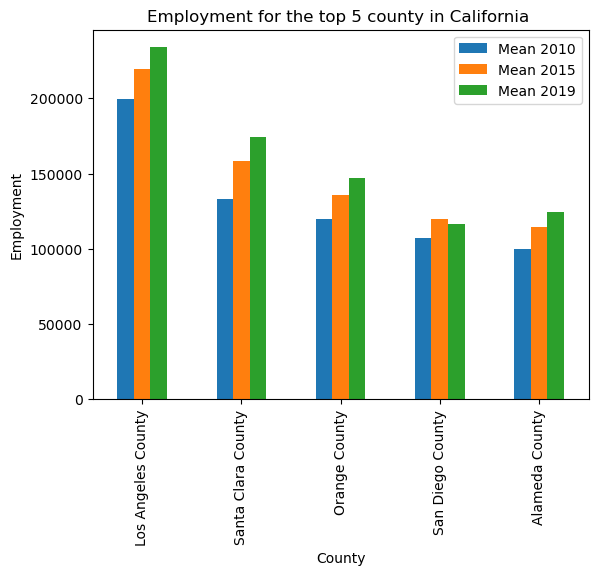

In [284]:
final2_data.reset_index().plot(
    x="Area Name", y=["Mean 2010", "Mean 2015",'Mean 2019'], kind="bar"
)
plt.title("Employment for the top 5 county in California ")
plt.xlabel("County")
plt.ylabel("Employment")

In [285]:
final3=final2_data.iloc[:,[0,1,6,11]].head()
final3

,Area Name,Mean 2010,Mean 2015,Mean 2019
0,Los Angeles County,199768.703704,219313.425926,233938.518519
1,Santa Clara County,132738.440860,158022.580645,173978.494624
2,Orange County,120013.448845,135445.462046,146846.617162
3,San Diego County,107271.864686,119936.468647,116413.500000
4,Alameda County,99934.895833,114464.062500,124254.166667


In [286]:
#
la_df=year_df.loc[(year_df['Area Name']=='Los Angeles County')& (year_df['Year']==2019)]

la_df.sort_values(by=['Current Employment'], ascending=False)

,Area Type,Area Name,Year,Date,Series Code,Industry Title,Current Employment
288542,County,Los Angeles County,2019,12/01/2019,1000000,Total Wage and Salary,4654500
288589,County,Los Angeles County,2019,12/01/2019,0,Total Nonfarm,4650600
284484,County,Los Angeles County,2019,11/01/2019,1000000,Total Wage and Salary,4650000
284533,County,Los Angeles County,2019,11/01/2019,0,Total Nonfarm,4645700
280423,County,Los Angeles County,2019,10/01/2019,1000000,Total Wage and Salary,4604000
...,...,...,...,...,...,...,...
244043,County,Los Angeles County,2019,01/01/2019,10000000,Mining and Logging,1900
280510,County,Los Angeles County,2019,10/01/2019,10000000,Mining and Logging,1900
248106,County,Los Angeles County,2019,02/01/2019,10000000,Mining and Logging,1900
288640,County,Los Angeles County,2019,12/01/2019,10000000,Mining and Logging,1900


In [287]:
indus_mean =year2019_df.groupby("Industry Title").mean()["Current Employment"]
indus_mean

indus_median = year2019_df.groupby("Industry Title").median()["Current Employment"]
indus_median

indus_variance = year2019_df.groupby("Industry Title").var()["Current Employment"]
indus_variance

indus_stdev = year2019_df.groupby("Industry Title").std()["Current Employment"]
area_stdev

indus_sem = year2019_df.groupby("Industry Title").sem()["Current Employment"]
indus_sem


# Assemble the resulting series into a single summary dataframe.
la_stats = pd.DataFrame({"Mean": indus_mean, "Median":indus_median, "Variance":indus_variance, 
                               "Standard Deviation": indus_stdev, "SEM": indus_sem})
la_stats

,Mean,Median,Variance,Standard Deviation,SEM
Industry Title,,,,,
Accommodation,18439.285714,8250.0,2.980364e+08,17263.730473,1883.627421
Accommodation and Food Service,58550.961538,25100.0,8.044043e+09,89688.589855,5077.616526
"Accounting, Tax Preparation and Bookkeep",30295.833333,29300.0,2.485978e+08,15766.984746,3218.422284
Activities Related to Credit Intermediat,7058.333333,7000.0,1.719697e+04,131.137217,37.856054
Activities Related to Real Estate,33016.666667,33050.0,4.151515e+04,203.752672,58.818330
...,...,...,...,...,...
Utilities,6466.666667,4600.0,1.569886e+07,3962.178333,660.363056
Warehousing and Storage,11575.000000,10700.0,6.276404e+07,7922.376067,1143.496489
Waste Management and Remediation Service,3488.888889,4000.0,2.621016e+06,1618.955179,269.825863


In [288]:
Pie_df=la_stats.sort_values(by=['Mean'], ascending=False)
Pie_df

,Mean,Median,Variance,Standard Deviation,SEM
Industry Title,,,,,
Total Nonfarm,332311.867089,104650.0,5.896500e+11,767886.735158,24939.801743
Total Wage and Salary,302240.977011,72850.0,4.491619e+11,670195.385500,25403.690528
Service Providing,256862.801724,56850.0,3.497276e+11,591377.702526,22416.113965
Individual and Family Services,233983.333333,233450.0,8.354242e+06,2890.370638,834.378133
Total Private,211270.151515,32100.0,4.119310e+11,641818.524929,27931.566092
...,...,...,...,...,...
Waste Management and Remediation Service,3488.888889,4000.0,2.621016e+06,1618.955179,269.825863
"Book, Periodical and Music Stores",2575.000000,2600.0,6.204545e+04,249.089250,71.905873
Other Motor Vehicle Dealers,2041.666667,2000.0,2.651515e+03,51.492865,14.864710


In [289]:
indus = Pie_df.iloc[:10]
indus

,Mean,Median,Variance,Standard Deviation,SEM
Industry Title,,,,,
Total Nonfarm,332311.867089,104650.0,5.896500e+11,767886.735158,24939.801743
Total Wage and Salary,302240.977011,72850.0,4.491619e+11,670195.385500,25403.690528
Service Providing,256862.801724,56850.0,3.497276e+11,591377.702526,22416.113965
Individual and Family Services,233983.333333,233450.0,8.354242e+06,2890.370638,834.378133
Total Private,211270.151515,32100.0,4.119310e+11,641818.524929,27931.566092
Private Service Providing,192350.955285,31800.0,3.310192e+11,575342.677276,25938.451081
Motion Picture and Sound Recording,132166.666667,132300.0,6.929333e+07,8324.261729,2403.007375
Limited-Service Eating Places,128054.166667,125650.0,3.496977e+09,59135.246454,12070.931636
Full-Service Restaurants,124937.500000,123850.0,3.276743e+09,57242.845101,11684.646827


In [292]:
#Take off the top 5 include : total non farm, total wage and salary, service provinding,total private 
Pie=indus.tail(5)
Pie




,Mean,Median,Variance,Standard Deviation,SEM
Industry Title,,,,,
Private Service Providing,192350.955285,31800.0,3.310192e+11,575342.677276,25938.451081
Motion Picture and Sound Recording,132166.666667,132300.0,6.929333e+07,8324.261729,2403.007375
Limited-Service Eating Places,128054.166667,125650.0,3.496977e+09,59135.246454,12070.931636
Full-Service Restaurants,124937.500000,123850.0,3.276743e+09,57242.845101,11684.646827
Restaurants,114431.944444,73950.0,1.568785e+10,125251.155938,14760.990286


Text(0, 0.5, ' ')

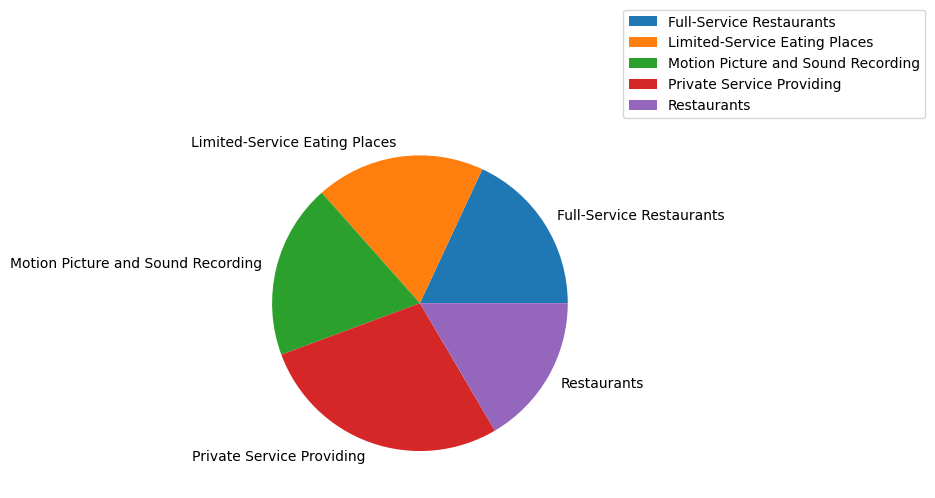

In [300]:

Pie.reset_index()
Pie.groupby(['Industry Title']).sum().plot(kind='pie', y='Mean')
plt.legend(loc=(1.05, 1))
plt.ylabel(' ')

